In [1]:
# initialize accelerator and trackers (if enabled)
from os import makedirs, path, scandir
import pickle
import cv2
import json
from yacs.config import CfgNode as CN
from torch.utils.data import Dataset
from tqdm import tqdm
import logging
import random
import torch
# from src.datasets import FFPP,RPPG
from accelerate import Accelerator
from main import get_config, init_accelerator, set_seed, FFPP
logging.basicConfig(level="DEBUG")


class Obj:
    pass


c = FFPP.get_default_config()
c.augmentation = "normal+frame"
c.pair = 1
# c.contrast = 1
c.compressions = ["c23"]
# c.types = ["REAL", "DF", "FS", "F2F"]
c.types = ["DF", "FS", "F2F"]
accelerator = Accelerator(mixed_precision='no')
x = FFPP(c, 20, 5, lambda x: x, accelerator, split="train")
c

/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 3/3 [00:00<00:00, 2033.44it/s]


CfgNode({'category': 'train', 'root_dir': './datasets/ffpp/', 'detection_level': 'video', 'types': ['DF', 'FS', 'F2F'], 'compressions': ['c23'], 'name': 'FFPP', 'scale': 1.0, 'pack': 0, 'pair': 1, 'contrast': 0, 'augmentation': ['normal', 'frame'], 'random_speed': 1})

In [2]:
typ, cmp, idx, _ = x.video_list[0]
x.video_table[typ][cmp][idx]

{'fps': 30,
 'frames': 453,
 'duration': 15.1,
 'path': './datasets/ffpp/DF/c23/videos/071_054.avi'}

In [3]:
a = x.get_dict(7079, True)

ERROR:root:Error occur: 


StopIteration: 

In [4]:
len(x)

6513

In [29]:
frames, label, mask, _, _ = x[random.randint(0, len(x))]
(len(frames), label, len(mask))

DEBUG:root:Item/Video Index:1780/544
DEBUG:root:Item DF/COMP:DF/c23
DEBUG:root:Video Speed Motion Factor: 0.9920653720246674
DEBUG:root:Video Shift Factor: 0.007076033767419798
DEBUG:root:Loading Video: ./datasets/ffpp/DF/raw/videos/019_018.avi
DEBUG:root:Sample Offset: 5
DEBUG:root:Sample Stride: 0.25789473684210523
DEBUG:root:Video: ./datasets/ffpp/DF/raw/videos/019_018.avi, Completed!
DEBUG:root:Loading Video: ./datasets/ffpp/DF/c23/videos/019_018.avi
DEBUG:root:Sample Offset: 5
DEBUG:root:Sample Stride: 0.25789473684210523
DEBUG:root:Video: ./datasets/ffpp/DF/c23/videos/019_018.avi, Completed!


(2, 1, 20)

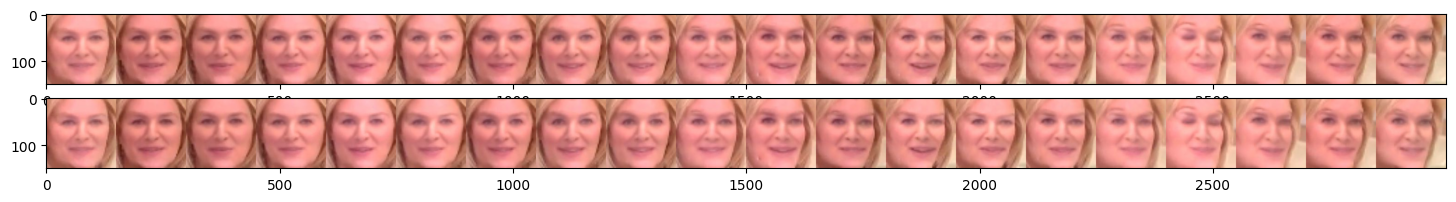

In [30]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 2))
plt.subplot(2, 1, 1)
plt.imshow(
    np.stack(
        frames["raw"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((150, -1, 3))
)
plt.subplot(2, 1, 2)
plt.imshow(
    np.stack(
        frames["c23"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((150, -1, 3))
)

In [ ]:
# for i in tqdm(range(len(x))):
#     try:
#         x[i]
#     except Exception as e:
#         print(f"Error Occur at {i}:{e}")